In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from qiskit_textbook.widgets import binary_widget


In [2]:
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

In [3]:
n = 8
n_q = n
n_b = n
# define n_q num of qubits input and num of 
# bits n_b as output
qc_output = QuantumCircuit(n_q,n_b)

In [4]:
# measurement of j qubit and write output to bit j
for j in range(n):
    qc_output.measure(j,j)

In [5]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

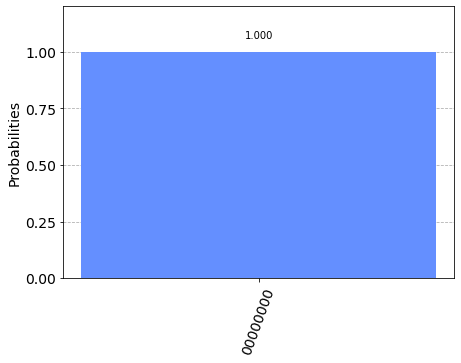

In [6]:
# here we run on a quantum computer simulator, to run on a real machine
# the backend must be changed
sim = Aer.get_backend('qasm_simulator') 
qobj = assemble(qc_output)  
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [7]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)  # X operation is like classical NOT
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [8]:
# simply add two circuits
qc = qc_encode + qc_output
qc.draw()

┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
           ║ └╥┘┌─┐               
q_2: ──────╫──╫─┤M├───────────────
           ║  ║ └╥┘┌─┐            
q_3: ──────╫──╫──╫─┤M├────────────
           ║  ║  ║ └╥┘┌─┐         
q_4: ──────╫──╫──╫──╫─┤M├─────────
           ║  ║  ║  ║ └╥┘┌─┐      
q_5: ──────╫──╫──╫──╫──╫─┤M├──────
           ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ──────╫──╫──╫──╫──╫──╫─┤M├───
     ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/══════╩══╩══╩══╩══╩══╩══╩══╩═
           0  1  2  3  4  5  6  7

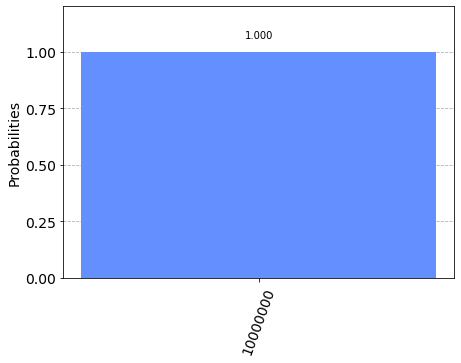

In [9]:
job = assemble(qc)
counts = sim.run(job).result().get_counts()
# note: qubit 7 is the leftmost
plot_histogram(counts)

In [10]:
qc_cnot = QuantumCircuit(2)
# controlled NOT gate = XOR
# control qubit has dot the other is called target qubit
# the output of our XOR is on q_1
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [11]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()
# here we would measure 11 since the first is inverted
# thus from initial state <0| to <1| which will
# give a binary bit value of 1 when measured
# similarly on q_1 we get the XOR output of <1|

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [12]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [13]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

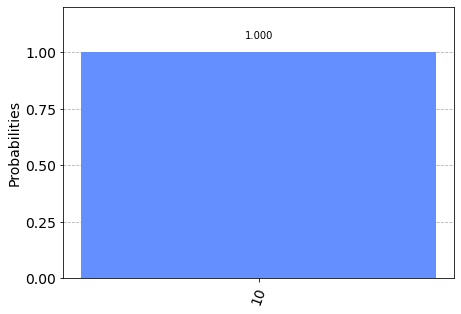

In [14]:
# with the above circuit we achieved a simple
# adder, e.g. 0 + 0 = 00, 1 + 1 = 10, 0 + 1 = 01
# where inputs are encoded as single bits either 0 or 1
# with 2 bits output 
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [15]:
# quatum mechanics gives us other gates then the one 
# we already knew, thus we can design new algorithms
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [16]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In [17]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [18]:
svsim = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit

In [19]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = svsim.run(qobj).result() # Do the simulation and return the result

In [20]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


In [21]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

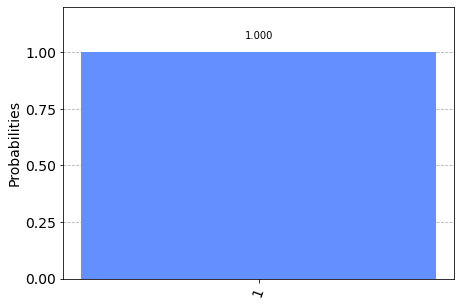

In [22]:
qobj = assemble(qc)
result = svsim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

In [26]:
# now use superposition state
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

In [25]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

[0.70710678+0.j         0.        +0.70710678j]


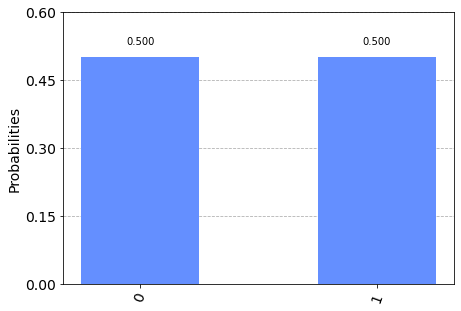

In [27]:
qobj = assemble(qc)
results = svsim.run(qobj).result().get_counts()
plot_histogram(results)

In [28]:
# state vectors are ensured to be normalized since
# QM constraint <phi|phi> = 1 for state phi
vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

In [29]:
# Run the code in this cell to interact with the widget
# to check if valid state vector +-1% accuracy
# the below vector will result in state <0| having
# 1/3 probability to be in and 2/3 to be in <1|
# <x|phi> = prob. of finding |phi> in state |x> !
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

In [30]:
# states can have a phase factor e.g. i|1> and be equivalent
# to the state |1> if <x'|x> = 1 (global phase), changes in 
# the reltive phase (e.g. change of only one factor in a
# superposition state)

In [32]:
# when measuring a qubit we will find it in a certain state and
# redoing the measurement won't change the measurement (observer effect)
# on the qubit since probabilities collapse under measurement
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw()

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

In [33]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
# will be in the expected state we initiallized it
print("Qubit State = " + str(state))

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


In [34]:
qc.measure_all()
qc.draw()

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

In [40]:
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+0.j 1.+0.j]


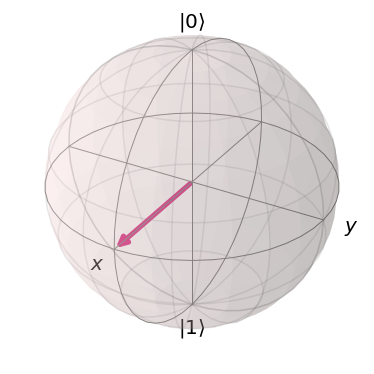

In [41]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
# we can expressed a mixed state of <0| and <1|
# with 2 parameters theta and phi (radius implicitly 1 by normalization)
# thus we are able to visualize states on a sphere called Bloch sphere!
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

In [42]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [43]:
# Let's do an X-gate on a |0> qubit
# the X gate often called NOT gate (as prev.)
# what is done really is the first pauli matrix
# applied (represented by a lin. comb. of states <0| and <1|)
# note: |0><1| is like v.T @ v = 2x2 matrix
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

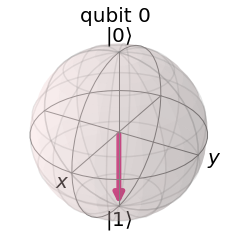

In [44]:
# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [45]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')
# we see that the Z gate has no effect since the 
# third Pauli matrix has eigenstates <0| and <1|
# the other 2 are mixed states of <0| and <1|
# thus they will randomly change to either of them
# note: the results here are either <0| or <1| but
# never a superposition
# note: the <0| and <1| are building a bases in which
# the other eigenstates of the Pauli matrices can be written in
# and we can obtain the state transition propabilities 
# when we apply the Y or Z gates

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [46]:
# append operation to quantum circuit
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ Y ├┤ Z ├
     └───┘└───┘└───┘

In [47]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')
# with the Hadamard gate H we can switch between
# <0|, <1| and <+| and <-| (eigenstates of first Pauli matrix)
# by bases switching is meant that e.g. a mixed state of <0|, <1|
# before is represented after applying H by <+|, <-| and the 
# scalar factors before the vectors are the new coordinates in
# <+|, <-| bases! 

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [83]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    # with the H operator we will get from Z basis to X basis
    qc.measure(qubit, cbit)
    return qc

# let the initial state be |+> use [1/sqrt(2), 1/sqrt(2)]
# or [1/sqrt(2), -1/sqrt(2)] for |-> and we will always
# get the same value since we are in an eigenstate
initial_state = [1/sqrt(2), 1/sqrt(2)]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌─────────────────────────────┐┌───┐┌─┐
q_0: ┤ initialize(0.70711,0.70711) ├┤ H ├┤M├
     └─────────────────────────────┘└───┘└╥┘
c: 1/═════════════════════════════════════╩═
                                          0

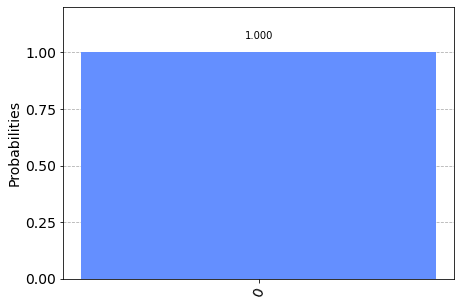

In [84]:
qasmsim = Aer.get_backend('qasm_simulator')  # Tell Qiskit how to simulate our circuit
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = qasmsim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output state vector

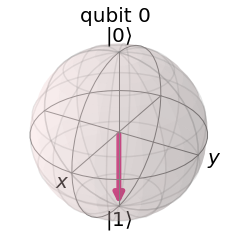

In [89]:
# if we measure the probability to be in <+| or <-|
# when not in the eigenstate e.g. in <0| we will get 
# a non deterministic result!
initial_state = [1, 0]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0

svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [90]:
# rotation operation (gate)
# performs rotation around the z axis
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+rz')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [93]:
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(pi/4, 0)  # note: 4pi => 360
qc.draw()

┌───┐┌─────────┐
q_0: ┤ H ├┤ RZ(π/4) ├
     └───┘└─────────┘

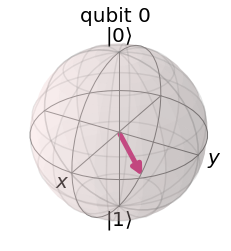

In [94]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [95]:
# I (identity) gate is a XX gate
# the S gate is a pi/2 turn with the rotation operator (rotation for 90 degrees)
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
# Sdg ... where the dg stands for dagger (=> S adjungiert, -45 degree rotation)
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q_0: ┤ S ├┤ SDG ├
     └───┘└─────┘

In [96]:
# T gate for pi/4 rotation also around z-axis of Bloch sphere
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q_0: ┤ T ├┤ TDG ├
     └───┘└─────┘

In [97]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [ ]:
# U1, U2, U3 gates are the most general ones for rotation
# U1, U2 a special cases with some input parameters fixed of U3 